<a href="https://colab.research.google.com/github/vixbi/machinelearning/blob/main/HW1_Shumakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в ML

## Исходные данные

Будем использовать датасет по стоимости страховых услуг - подробнее см. [соревнование на Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [ ]:
import logging
import os
import shutil

import gdown
import numpy as np


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

file_url = 'https://drive.google.com/file/d/1rM-2syrHv9LAJWi_iHI24giTEWgNbbvB/view?usp=sharing'

root_data_dir = '/content/'
file_name = 'insurance.csv'

if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  gdown.download(file_url, file_name, quiet=False, fuzzy=True)
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

Downloading...
From: https://drive.google.com/uc?id=1rM-2syrHv9LAJWi_iHI24giTEWgNbbvB
To: /content/insurance.csv
100%|██████████| 55.6k/55.6k [00:00<00:00, 54.4MB/s]


Среди файлов находится `insurance.csv` - это и есть данные по стоимости страховки, на примере которых мы познакомимся с основными понятиями ML

Прочитаем файл с помощью бибилиотеки pandas

In [ ]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, file_name))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Наш таргет (целевая переменная) находится в столбце `charges`

Визуализируем переменную с помощью `.scatter`

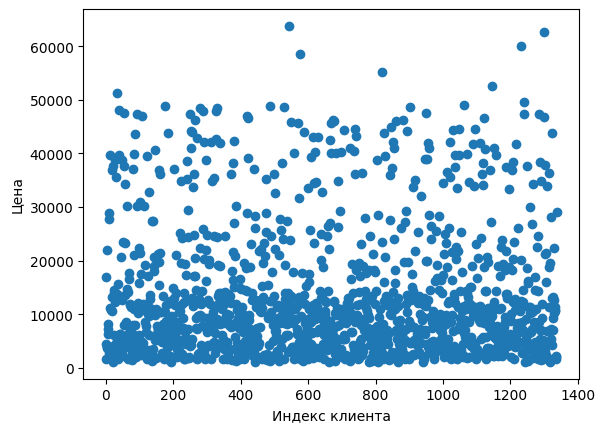

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

Получается не очень наглядно - попробуем визуализировать с помощью метода `.hist()` который реализован в pandas

<Axes: >

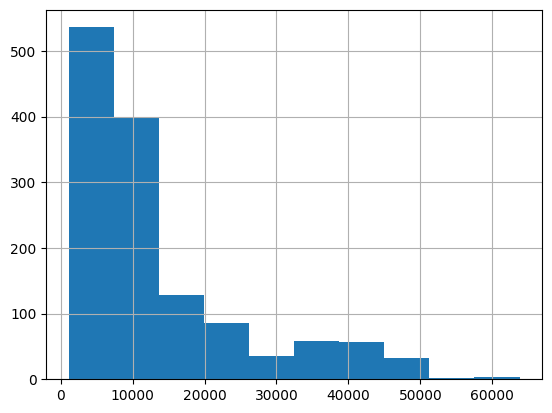

In [ ]:
y.hist()

Для каждого объекта построим предсказания с помощью модели линейной регрессии. Воспользуемся как чёрным ящиком питоновским объектом из бибилиотеки [sklearn](https://scikit-learn.org/stable/)

Модели машинного обучения не могут работать с текстом напрямую (вспоминаем лекцию) - а у нас много текстовых полей, их нужно трансформировать в числа - воспользуемся классом `sklearn.preprocessing.LabelEncoder` из библиотеки sklearn

Чтобы преобразовать колонку в текст нужно воспользоваться методом [.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)

In [ ]:
#-------- ВАШ КОД ТУТ -------------------
from sklearn import preprocessing
vectorizer = preprocessing.LabelEncoder()

for col in insurance_df:
    if insurance_df[col].dtype == 'object':
        insurance_df[col] = vectorizer.fit_transform(insurance_df[col])

# проверяем, приведены ли типы данных к нужному виду
print(insurance_df.dtypes)

# чек как в примере
insurance_df.head()
#----------------------------------------

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Обучим линейную регрессию - это класс [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Что нужно для счастья
* создать объект
* разделить данные на тренировочные и тестовые
* вызвать метод *.fit()* для тренировочной выборки

Загляните в документацию метода [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) который принимает на вход два аргумента

* $X$ - матрица объекты - признаки. Удалите из датафрейма `insurance_df` столбец `charges` и сохраните результат в переменную $X$
* $y$ - значение целевой переменной

Для разбиения данных нам понадобится функция `sklearn.model_selection.train_test_split`

Функция принимает несколько аргументов

* `X, y` - первые два аргумента, которые нужно засплиттить
* `test_size=0.33` - доля датасета, которая уйдет в тест
* `random_state=RANDOM_SEED` - фиксирует разбиение

Для чего нужен этот сплит? Модель обучается (то есть подбирает коэффициенты $w_1, ..., w_k$, с помощью которых можно выразить линейную зависимость $y$ от $X$) на тренировочных данных, а потом мы тестируем её качество (т.е. измеряем ошибку) на тестовых.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#-------- ВАШ КОД ТУТ -------------------
X = insurance_df.drop('charges', axis=1)
reg = LinearRegression() # объект модели линейной регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=RANDOM_SEED)
reg.fit(X_train, y_train)
#----------------------------------------

LinearRegression()

In [ ]:
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1


Добавим к датафрейму столбец `prediction`

In [ ]:
res_pred = X_test.copy()

res_pred['prediction'] = reg.predict(res_pred)

Задача - посчитайте эмпирический риск по формуле

$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

где $h(\cdot)$ - значение столбца prediction

Для удобства создайте столбец `squared_loss` - там должно храниться значение $L(y,\hat{y})$:

$L(y,\hat{y}) = (y - \hat{y})^2$

Пользоваться можно только функциями pandas

Полученное значение $Q$ округлите с помощью `np.round(Q, decimals=1)`

In [ ]:
num_rows = res_pred.shape[0]
res_pred['squared_loss'] = np.zeros(num_rows)
res_pred['real_value'] = y_test.values
#-------- ВАШ КОД ТУТ -------------------
res_pred['squared_loss'] = (res_pred['real_value'] - res_pred['prediction'])**2

qemp = np.round(res_pred['squared_loss'].sum()/num_rows, decimals=1)
qemp

#----------------------------------------

35132017.9

In [ ]:
res_pred['real_value']

,real_value
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
644,18806.14547
602,11070.53500
731,10065.41300
321,24671.66334


Визуализируем гистограмму остатков линейной регрессии - это разница между истинным и предсказанным значением.

<Axes: >

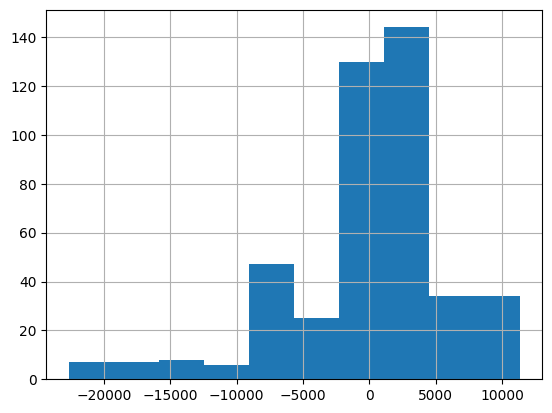

In [ ]:
(res_pred['prediction'] - y_test).hist()

Кстати, метрику качества необязательно считать вручную - в sklearn реализовано [огромное количество метрик](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) для регрессии (и других задач тоже)

Подробнее о метриках регрессии мы поговорим в дальнейших занятиях

В качестве упражнения посчитайте какую-нибудь метрику - например, MAE - [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [ ]:
#-------- ВАШ КОД ТУТ -------------------

from sklearn.metrics import  mean_absolute_error, explained_variance_score
mae = mean_absolute_error(res_pred['real_value'], res_pred['prediction'])
evs = explained_variance_score(res_pred['real_value'], res_pred['prediction'])
print('The mean absolute error is ', mae)
print('The explained variance score is ', evs)
#----------------------------------------

The mean absolute error is  4204.415654724192
The explained variance score is  0.7602680974506375


Мы поговорили про фичи, про метрики - можно немного углубиться в модель, что представляет собой линейная регрессия?

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. суммы с некоторыми весами *важности*) признаков объекта. Сами признаки называются *предикторами*:,
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

К признаковому пространству добавляется "фиктивный" признак $x_0=1$, "важность" которого сохраняется в коэффициент $w_0$.

То есть "семейство функций" представляет собой всевозможные комбинации $[w_0, w_1 , w_2 , w_3 , w_4 , w_5 , w_6]$ а метод *.fit()* волшебным образом подбирает их так, чтобы получить максимальное качество.

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. ,
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

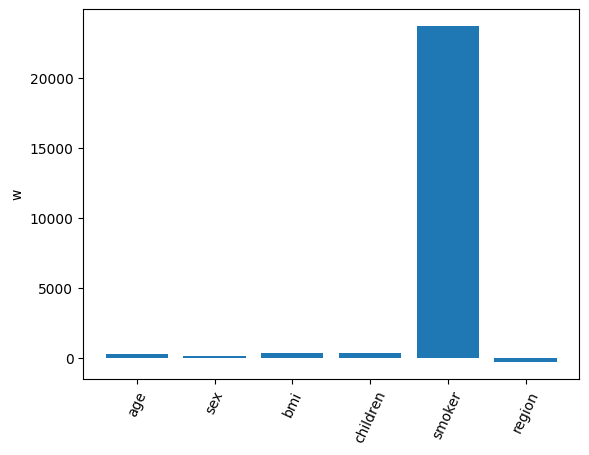

In [ ]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

Попробуем провести нормализацию и посмртрим, изменятся ли результаты.

In [ ]:
# нормализация

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = X_train.columns
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=cols)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=cols)

In [ ]:
# обучение и результаты

reg_norm = LinearRegression()
reg_norm.fit(X_train_normalized, y_train)

res_pred_normalized = X_test_normalized.copy()
res_pred_normalized['prediction'] = reg.predict(res_pred_normalized)

num_rows_normalized = res_pred_normalized.shape[0]
res_pred_normalized['squared_loss'] = np.zeros(num_rows_normalized)
res_pred_normalized['real_value'] = y_test.values

#Qemp
res_pred_normalized['squared_loss'] = (res_pred_normalized['real_value'] - \
                                       res_pred_normalized['prediction'])**2
qemp_normalized = np.round(res_pred_normalized['squared_loss'].sum()/num_rows_normalized,
                           decimals=1)
mae_normalized = mean_absolute_error(res_pred_normalized['real_value'],
                                     res_pred_normalized['prediction'])
evs_normalized = explained_variance_score(res_pred_normalized['real_value'],
                               res_pred_normalized['prediction'])

print('The Quvalues()emp metric in normalized case is ', qemp_normalized)
print('The mean absolute error in normalized case is ', mae_normalized)
print('The explained variance score in normalized case is ', evs_normalized)

The Quvalues()emp metric in normalized case is  474440845.4
The mean absolute error in normalized case is  20562.786344522334
The explained variance score in normalized case is  0.6478024882276459


Почему-то ошибка стала больше, а также сократилась доля объясненной дисперсии

<Axes: >

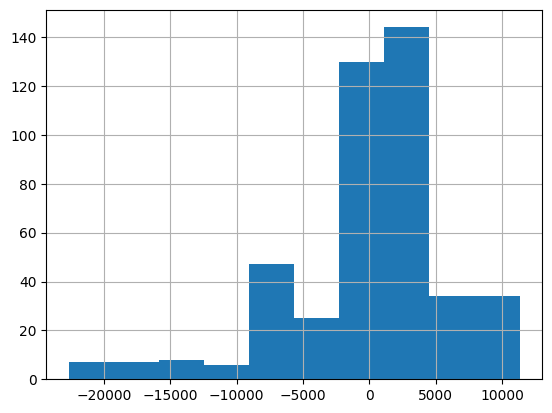

In [ ]:
(res_pred['prediction'] - y_test).hist()

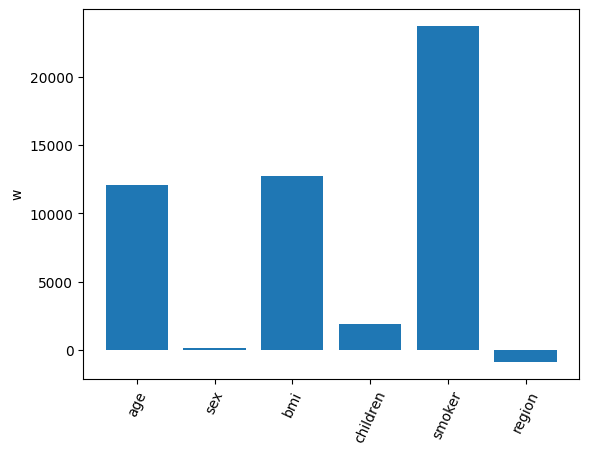

In [ ]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg_norm.coef_)
subplot.set_xticks(np.arange(len(reg_norm.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()